# <a href="https://thetahat.ru/courses/ad">Введение в анализ данных</a>
## Домашнее задание 3, <font color="orange">сложная часть</font>. Линейная и логистическая регрессии.


**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@thetahat_ds25_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**. Если вы строите интерактивные графики, их стоит прислать в формате html.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания всем участникам списывания дается штраф -2 балла к итоговой оценке за семестр.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Обратите внимание на <a href="https://thetahat.ru/courses/ai-rules"><b>правила использования ИИ-инструментов</b></a> при решении домашнего задания.
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Решение проверяется системой ИИ-проверки <a href="https://thetahat.ru/"><img src="https://miptstats.github.io/theta_grader_small.png" style="display: inline; vertical-align: middle;"></a> **ThetaGrader**. Результат проверки валидируется и исправляется человеком, после чего комментарии отправляются студентам.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.

**Правила оформления теоретических задач:**

* Решения необходимо оформить в виде $\LaTeX$ в markdown-ячейках. Иные способы (в т.ч. фотографии) не принимаются.
* Если вы не знаете $\LaTeX$, используйте ИИ-инструменты для оформления черновика решения. Примеры были показаны на лекции 2 по ИИ-инструментам.
* **В решениях поясняйте, чем вы пользуетесь**, хотя бы кратко.
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.


<b><font size="5" color="red">Важно!!! Правила заполнения ноутбука:</font></b>
* Запрещается удалять имеющиеся в ноутбуке ячейки, менять местами положения задач.
* Сохраняйте естественный линейный порядок повествования в ноутбуке сверху-вниз.
* Отвечайте на вопросы, а также добавляйте новые ячейки в предложенных местах, которые обозначены `<...>`.
* В markdown-ячейка, содержащих описание задачи, находятся специальные отметки, которые <font color="red"><b>запрещается модифицировать</b></font>.
* При нарушении данных правил работа может получить 0 баллов.


**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):

* Задачи 1-4: скачайте первый ноутбук с условием задания со страницы курса.

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):

* Задача 5 &mdash; 80 баллов;
* Задача 6 &mdash; 70 баллов;
* Задача 7 &mdash; 50 баллов.

Баллы учитываются в <b>обязательной части</b> курса и не влияют на оценку по факультативной части.

In [299]:
# Bot check

# HW_ID: fpmi_ad3_part2
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: not final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [300]:
import numpy as np
import pandas as pd
import seaborn as sns
from typing import Literal
from scipy.special import expit
import matplotlib.pyplot as plt

sns.set(style="whitegrid", palette="Set2")

При решении задания используйте `sklearn`. Пропишите сюда необходимые импорты

In [301]:
from sklearn.base import BaseEstimator
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy.special import expit
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
import sklearn.metrics

import time

---
### <font color="blue"><i>Легкая часть</i></font>

Задачи 1-4: скачайте первый ноутбук с условием задания со страницы курса.

---
### <font color="orange"><i>Сложная часть</i></font>

---
### Задача 5.

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- a33928f56f5dc26d8a6754dd7365e93a -->
**1.** Реализуйте логистическую регрессию для двух вариантов поиска оценки параметров:
* простой градиентный спуск;
* стохастический градиентный спуск с `batch_size` элементами на каждой итерации.

Останавливайте итерации при выполнении хотя бы одного из двух условий:
* количество итераций превзошло число `max_iter`;
* оптимизируемый функционал изменился за итерацию не более чем на `tol`.

При выполнении каждой итерации с целью дальнейшего анализа сохраняйте текущее значение оптимизируемого функционала, а также затраченное время на итерацию.  **При реализации класса запрещено пользоваться ИИ-инструментами.**

*Замечания.*

1. Для чистоты эксперимента время шага внутри цикла нужно замерять от конца предыдущего шага до конца текущего, а не от начала текущего шага. Время измеряйте с помощью `from time import time`.

2. Иногда при подсчете сигмоиды и оптимизируемого функционала могут возникать вычислительные ошибки. Для их избежания существуют специальные трюки.
    * [How to Evaluate the Logistic Loss and not NaN trying](http://fa.bianp.net/blog/2019/evaluate_logistic/)
    * [Exp-normalize trick](https://timvieira.github.io/blog/post/2014/02/11/exp-normalize-trick/)<br>
3. Трюки не обязательно реализовывать самостоятельно, можете воспользоваться функциями для них из `numpy` или `scipy`:
    * [`numpy.logaddexp`](https://numpy.org/doc/stable/reference/generated/numpy.logaddexp.html);
    * [`scipy.special.logsumexp`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.logsumexp.html).
4. Обратите внимание, что класс `LogisticRegression` &mdash; наследник класса `BaseEstimator`, это с легкостью позволит использовать наш класс в различных пайплайнах библиотеки `sklearn`.
4. Следите за качеством кода, комментируйте логические этапы кода. Несоблюдение этого требования может привести к потере баллов.


In [302]:
 # При реализации класса запрещено пользоваться ИИ-инструментами.


class LogisticRegression(BaseEstimator):
    """Модель логистической регрессии.

    Параметры:
    method (Literal['gd', 'sgd']): Метод оптимизации ('gd' - градиентный спуск,
        'sgd' - стохастический градиентный спуск).
    learning_rate (float): Константа скорости обучения, на которую домножаем градиент при обучении
    tol (float): Допустимое изменение функционала между итерациями.
    max_iter (int): Максимальное число итераций.
    batch_size (int): Размер выборки для оценки градиента (используется только при 'sgd').
    fit_intercept (bool): Добавлять ли константу в признаки.
    save_history (bool): Сохранять ли историю обучения.
    """

    def __init__(
        self,
        method: Literal["gd", "sgd"] = "gd",
        learning_rate: float = 0.5,
        tol: float = 1e-4,
        max_iter: int = int(1e3),
        batch_size: int = 64,
        fit_intercept: bool = True,
        save_history: bool = True,
    ):
        """Создает модель и инициализирует параметры."""
        self.method = method
        self.learning_rate = learning_rate
        self.tol = tol
        self.max_iter = max_iter
        self.batch_size = batch_size
        self.fit_intercept = fit_intercept
        self.save_history = save_history
        self.history = [] # История обучения
        self.coef_ = []

    @staticmethod
    def _sigmoid(x: np.ndarray) -> np.ndarray:
        sigmoid = np.zeros_like(x, dtype=np.float64)
        mask = x >= 0
        sigmoid[mask] = 1 / (1 + np.exp(-x[mask]))
        sigmoid[~mask] = np.exp(x[~mask]) / (1 + np.exp(x[~mask]))
        return sigmoid

    def expit_b(self, x, b):
      """Compute sigmoid(x) - b component-wise."""
      idx = x < 0
      out = np.zeros_like(x)
      exp_x = np.exp(x[idx])
      b_idx = b[idx]
      out[idx] = ((1 - b_idx) * exp_x - b_idx) / (1 + exp_x)
      exp_nx = np.exp(-x[~idx])
      b_nidx = b[~idx]
      out[~idx] = ((1 - b_nidx) - b_nidx * exp_nx) / (1 + exp_nx)
      return out

    def _grad(self, x:np.ndarray, A:np.ndarray, b:np.ndarray) -> np.ndarray:
      z = A.dot(x)
      s = self.expit_b(z, b)
      return A.T.dot(s) / A.shape[0]

    def logsig(self, x):
      """Compute the log-sigmoid function component-wise."""
      out = np.zeros_like(x)
      idx0 = x < -33
      out[idx0] = x[idx0]
      idx1 = (x >= -33) & (x < -18)
      out[idx1] = x[idx1] - np.exp(x[idx1])
      idx2 = (x >= -18) & (x < 37)
      out[idx2] = -np.log1p(np.exp(-x[idx2]))
      idx3 = x >= 37
      out[idx3] = -np.exp(-x[idx3])
      return out

    def _add_intercept(self, X: np.ndarray) -> np.ndarray:
        """Добавляет свободный коэффициент к матрице признаков.

        Параметры: X (np.ndarray): Исходная матрица признаков.

        Возвращает: np.ndarray: Матрица X с добавленным свободным
        коэффициентом.
        """
        X_copy = np.full((X.shape[0], X.shape[1] + 1), fill_value=1)
        X_copy[:, :-1] = X
        return X_copy

    def fit(self, X: np.ndarray, Y: np.ndarray):
        """Обучает модель логистической регрессии.

        Также, в случае self.save_history=True, добавляет в self.history
        текущее значение оптимизируемого функционала и затраченное время.

        Параметры:
        X (np.ndarray): Матрица признаков.
        Y (np.ndarray): Вектор истинных меток.

        Возвращает:
        LogisticRegression: Обученная модель.
        """
        if X.shape[0] != Y.shape[0]:
            raise ValueError("Количество строк в X и Y должно совпадать")
        self.intercept_ = 0;

        if self.fit_intercept:
            X_copy = self._add_intercept(X)
        else:
            X_copy = X.copy()

        theta = np.ones(X_copy.shape[1])
        z = np.dot(X_copy, theta)
        Y = np.asarray(Y)
        prev_loss = np.mean((1 - Y) * z - self.logsig(z))
        prev_time = time.time()
        for i in range(self.max_iter):
          if self.method == 'gd':
              grad = self._grad(theta, X_copy, Y)
          else:
              batch = np.random.randint(0, X_copy.shape[0], self.batch_size)
              X_b = X_copy[batch]
              Y_b = Y[batch]
              grad = self._grad(theta, X_b, Y_b)
          theta -= self.learning_rate * grad
          z = np.dot(X_copy, theta)
          Y = np.asarray(Y)
          curr_loss = np.mean((1 - Y) * z - self.logsig(z))
          curr_time = time.time()
          self.history.append([curr_loss, curr_time - prev_time])
          if np.abs(curr_loss - prev_loss) < self.tol:
            self.coef_ = theta
            break
          else:
            prev_loss = curr_loss
            prev_time = curr_time
            self.coef_ = theta
        if (self.fit_intercept == True):
          self.intercept_ = theta[-1]
        self.coef_ = theta
        return self


    def predict(self, X: np.ndarray) -> np.ndarray:
        """Возвращает предсказанные классы.

        Параметры: X (np.ndarray): Матрица признаков.

        Возвращает: np.ndarray: Предсказанные классы.
        """
        if self.fit_intercept:
            X_copy = self._add_intercept(X)
        else:
            X_copy = X.copy()

        if X_copy.shape[1] != self.coef_.shape[0]:
            raise ValueError("Число признаков в X не соответствует числу коэффициентов модели")
        predictions = self.predict_proba(X)

        for i in range(len(predictions)):
          if (predictions[i] >= 0.5):
            predictions[i] = 1;
          else:
            predictions[i] = 0;
        return predictions

    def predict_proba(self, X: np.ndarray) -> np.ndarray:
        """Возвращает вероятности классов 0 и 1.

        Параметры: X (np.ndarray): Матрица признаков.

        Возвращает: np.ndarray: Матрица вероятностей классов (n_samples,
        2).
        """
        if self.fit_intercept:
            X_copy = self._add_intercept(X)
        else:
            X_copy = X.copy()

        if X_copy.shape[1] != self.coef_.shape[0]:
            raise ValueError("Число признаков в X не соответствует числу коэффициентов модели")

        return self._sigmoid(X_copy @ self.coef_)


<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 00000000000000000000000000000000 -->
Рассмотрим датасет [Diabetes Health Indicators](https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset).

**Для данного задания будем рассматривать версию датасета** `diabetes_binary_5050split_health_indicators_BRFSS2015.csv`


Этот датасет содержит статистику здравоохранения и информацию об образе жизни, полученную в результате опросов вместе с меткой наличия/отсутствия диабета у участников. Среди признаков есть демографические данные, результаты лабораторных тестов и ответы на вопросы анкеты. Целевая переменная  `Diabetes_binary` определяет статус пациента: есть ли у него диабет или предиабет (`1`), или он здоров (`0`).



Рассмотрим некоторые признаки, представленные в датасете.

**Показатели здоровья**

- `HighBP`: Высокое кровяное давление (`1` = да, `0` = нет).

- `HighChol`: Высокий уровень холестерина (`1` = да, `0` = нет).

- `CholCheck`: Проверка уровня холестерина за последние 5 лет (`1` = да, `0` = нет).

- `BMI`: Индекс массы тела (рассчитывается как вес (кг) / рост² (м²)).

- `GenHlth`: Общая оценка здоровья (`1` = отличное, `2` = очень хорошее, ..., `5` = плохое).

**Образ жизни**
- `Smoker`: Статус курения (`1` = выкурил ≥100 сигарет за жизнь, `0` = нет).

- `PhysActivity`: Физическая активность вне работы (`1` = да, `0` = нет).

- `Fruits`: Регулярное употребление фруктов (`1` = не менее 1 раз в день, `0` = реже).

**Доступ к медицине**
- `AnyHealthcare`: Наличие медицинской страховки (`1` = да, `0` = нет).

- `NoDocbcCost`: Отказ от визита к врачу из-за стоимости (`1` = да, `0` = нет).



Скачайте файл и прочитайте его с помощью `pandas`.

In [303]:
dataset = pd.read_csv("diabetes_binary_5050split_health_indicators_BRFSS2015.csv")
dataset.head()
print(dataset.columns)

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')


<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 2aaab795bfe3971fb1c1e61c48002808 -->
Разделите выборку на обучающую и тестовую и выполните преобразование категориальных признаков.

In [304]:
# необходимые признаки
features_columns = ["HighBP", "HighChol", "CholCheck", "BMI", "GenHlth", "Smoker", "PhysActivity", "Fruits", "AnyHealthcare", "NoDocbcCost", "Age"]
target_column = "Diabetes_binary" #целевой признак

X, y = dataset[features_columns], dataset[target_column]

#делим выборку на обучающую и тестовую
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)
X_train_copy, X_test_copy, y_train_copy, y_test_copy = X_train.copy(), X_test.copy(), y_train.copy(), y_test.copy()
#преобразуем категориальный признак GenHlth (BMI - вещественный, а все остальные и так бинарные)
encoder = OneHotEncoder(drop="first", sparse_output=False)
weather_encoded = encoder.fit_transform(X_train[["GenHlth"]])
weather_encoded_df = pd.DataFrame(weather_encoded, columns=encoder.get_feature_names_out(["GenHlth"]))
weather_encoded_df.index = X_train.index
weather_encoded_df = weather_encoded_df.astype(int)
X_train = X_train.drop(columns=["GenHlth"]).join(weather_encoded_df)

Для интерпретации коэффициентов необходимо нормализовать данные. Воспользуемся для этого классом `StandardScaler` из библиотеки `sklearn`.

In [305]:
scaler = StandardScaler()
#признак, требующий нормализации - BMI,AGE
BMIandAge_scaled = scaler.fit_transform(X_train[["BMI", "Age"]])

# Остальные признаки (кроме "BMI" и "Age")
other_features = X_train.drop(columns=["BMI", "Age"]).values

# Объединяем нормализованные данные с остальными признаками с помощью hstack
X_train_scaled = np.hstack((other_features, BMIandAge_scaled))

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 107ac5fe506b9f95aacd88457e0ec142 -->
**2.** Обучите две модели логистической регрессии с помощью методов
* простой градиентный спуск;
* стохастический градиентный спуск.

In [306]:
# Количество запусков для усреднения
num_runs = 5

# Списки для хранения результатов всех запусков
loss_sgd_all_runs = []
loss_gd_all_runs = []
time_sgd_all_runs = []
time_gd_all_runs = []

for run in range(num_runs):
    print(f"Run {run + 1}/{num_runs}")

    # Создаем и обучаем модели
    model_sgd = LogisticRegression(method='sgd')
    model_sgd.fit(X_train_scaled, y_train)

    model_gd = LogisticRegression()
    model_gd.fit(X_train_scaled, y_train)

    # Сохраняем историю обучения
    time_sgd = np.cumsum([model_sgd.history[i][1] for i in range(len(model_sgd.history))])
    time_gd = np.cumsum([model_gd.history[i][1] for i in range(len(model_gd.history))])
    loss_sgd = [model_sgd.history[i][0] for i in range(len(model_sgd.history))]
    loss_gd = [model_gd.history[i][0] for i in range(len(model_gd.history))]

    # Добавляем результаты текущего запуска в общие списки
    loss_sgd_all_runs.append(loss_sgd)
    loss_gd_all_runs.append(loss_gd)
    time_sgd_all_runs.append(time_sgd)
    time_gd_all_runs.append(time_gd)

Run 1/5
Run 2/5
Run 3/5
Run 4/5
Run 5/5


Постройте график, на котором нанесите две кривые обучения, каждая из которых отображает зависимость оптимизируемого функционала от номера итерации метода. **Функционал должен быть одинаковый для всех моделей**. Нарисуйте также график зависимости этого функционала от времени работы метода.

*Замечания:*
* Все графики должны быть информативны, с подписанными осями и т.д..
* Для чистоты эксперимента желательно не запускать в момент обучения другие задачи и провести обучение несколько раз, усреднив результаты.

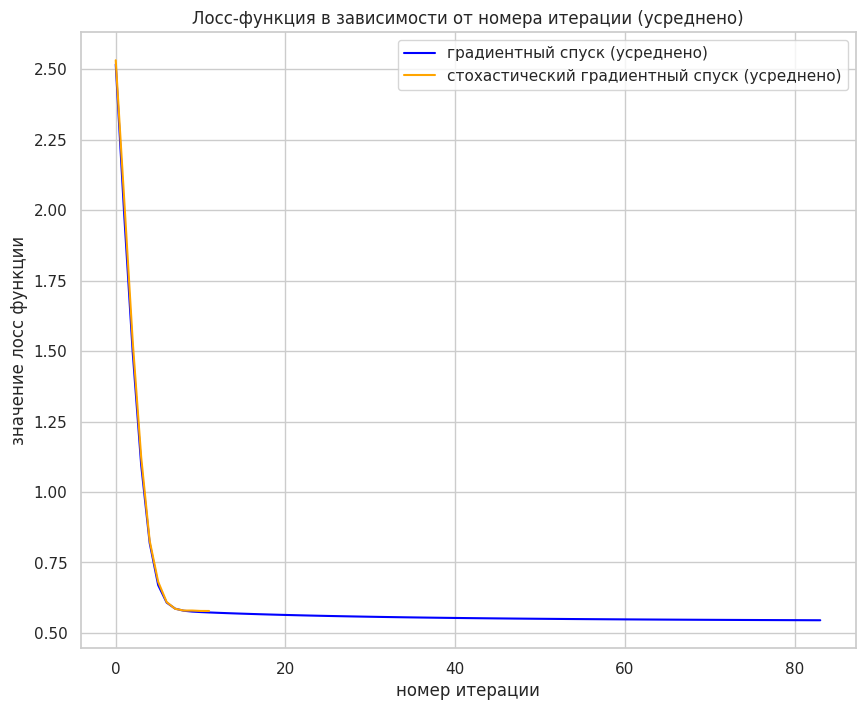

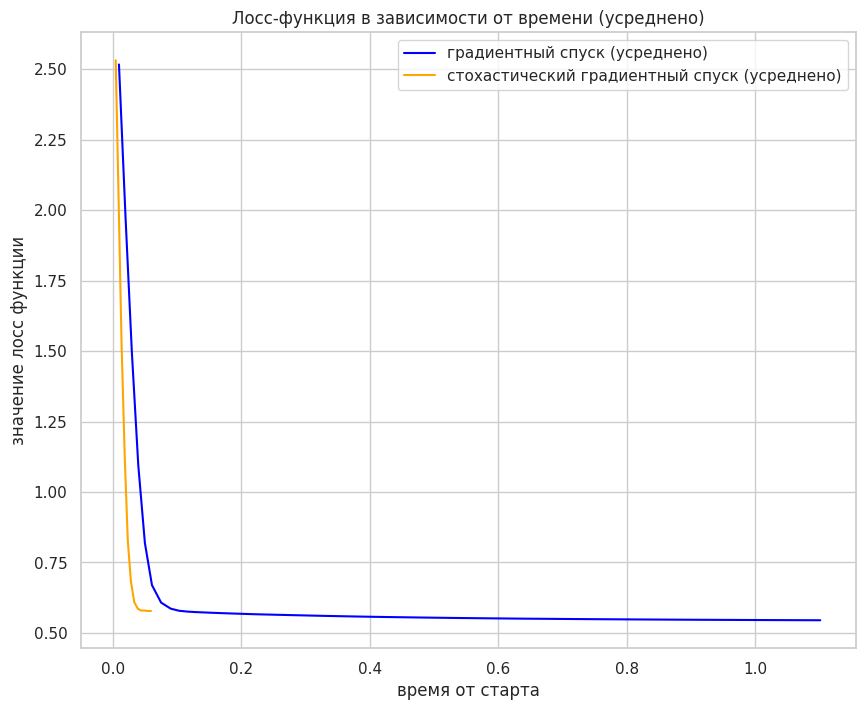

In [307]:
min_length_sgd = min(len(run) for run in loss_sgd_all_runs)
min_length_gd = min(len(run) for run in loss_gd_all_runs)

loss_sgd_all_runs = [run[:min_length_sgd] for run in loss_sgd_all_runs]
loss_gd_all_runs = [run[:min_length_gd] for run in loss_gd_all_runs]
time_sgd_all_runs = [run[:min_length_sgd] for run in time_sgd_all_runs]
time_gd_all_runs = [run[:min_length_gd] for run in time_gd_all_runs]

# Вычисляем средние значения по всем запускам
mean_loss_sgd = np.mean(loss_sgd_all_runs, axis=0)
mean_loss_gd = np.mean(loss_gd_all_runs, axis=0)
mean_time_sgd = np.mean(time_sgd_all_runs, axis=0)
mean_time_gd = np.mean(time_gd_all_runs, axis=0)

# Строим графики
plt.figure(figsize=(10, 8))
plt.plot(mean_loss_gd, label='градиентный спуск (усреднено)', color='blue')
plt.plot(mean_loss_sgd, label='стохастический градиентный спуск (усреднено)', color='orange')
plt.xlabel('номер итерации')
plt.ylabel('значение лосс функции')
plt.legend()
plt.title('Лосс-функция в зависимости от номера итерации (усреднено)')

plt.figure(figsize=(10, 8))
plt.plot(mean_time_gd, mean_loss_gd, label='градиентный спуск (усреднено)', color='blue')
plt.plot(mean_time_sgd, mean_loss_sgd, label='стохастический градиентный спуск (усреднено)', color='orange')
plt.xlabel('время от старта')
plt.ylabel('значение лосс функции')
plt.legend()
plt.title('Лосс-функция в зависимости от времени (усреднено)')

plt.show()


Сделайте выводы. Что будет при обучении на датасете, если  увеличить количество объектов, а число признаков оставить прежним?

1.Можем заметить, что стохастический градиентный спуск работает быстрее, чем градиентный спуск по времени (он буквально минимизирует быстрее по времени, можем пронаблюдать на графике выше).
2. При этом можем заметить, что от количества итераций он в среднем работает как и градиетный спуск.

3. Также при увеличии датасета(объектов количество), GD может работать заметно дольше, притом что работа SGD зависит лишь от batchsize

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 4bb375127a9740dd293a61773746352d -->
**3.** Исследуйте влияние размер шага (`learning_rate`) на качество модели для двух режимов обучения (простой и стохастический градиентный спуск). Для каждого размера шага получите качество модели при использовании простого и стохастического градиентного спуска. Сравните качество полученных моделей по метрике `accuracy`.

In [308]:
encoder = OneHotEncoder(drop="first", sparse_output=False)
weather_encoded = encoder.fit_transform(X_test[["GenHlth"]])
weather_encoded_df = pd.DataFrame(weather_encoded, columns=encoder.get_feature_names_out(["GenHlth"]))
weather_encoded_df.index = X_test.index
weather_encoded_df = weather_encoded_df.astype(int)
X_test = X_test.drop(columns=["GenHlth"]).join(weather_encoded_df)
BMIandAge_scaled = scaler.fit_transform(X_test[["BMI", "Age"]])

# Остальные признаки (кроме "BMI" и "Age")
other_features = X_test.drop(columns=["BMI", "Age"]).values

# Объединяем нормализованные данные с остальными признаками с помощью hstack
X_test_scaled = np.hstack((other_features, BMIandAge_scaled))

In [309]:
learning_rate_list = np.logspace(-5, 3, 8)
results = pd.DataFrame(columns=['learning_rate', 'accuracy_gd', 'accuracy_sgd'])
gd = []
sgd = []

for learning_rate in learning_rate_list:
    model_gd = LogisticRegression(learning_rate=learning_rate)
    model_gd.fit(X_train_scaled, y_train)
    y_pred = model_gd.predict(X_test_scaled)
    accuracy_gd = accuracy_score(y_test, y_pred)
    gd.append(accuracy_gd)

    model_sgd = LogisticRegression(method="sgd", learning_rate=learning_rate, batch_size=7)
    model_sgd.fit(X_train_scaled, y_train)
    y_pred = model_sgd.predict(X_test_scaled)
    accuracy_sgd = accuracy_score(y_test, y_pred)
    sgd.append(accuracy_sgd)


In [310]:
results = pd.DataFrame({
    'learning_rate': learning_rate_list,
    'gd_result': gd,
    'sgd_result': sgd
})

# Выводим таблицу
print(results)

# Находим лучший accuracy для GD и SGD
best_gd_accuracy = results['gd_result'].max()
best_sgd_accuracy = results['sgd_result'].max()

# Выводим лучшие значения
print(f"Лучший accuracy для GD: {best_gd_accuracy}")
print(f"Лучший accuracy для SGD: {best_sgd_accuracy}")

# Если нужно найти learning_rate, соответствующий лучшему accuracy
best_gd_lr = results.loc[results['gd_result'].idxmax(), 'learning_rate']
best_sgd_lr = results.loc[results['sgd_result'].idxmax(), 'learning_rate']

print(f"Learning rate для лучшего GD accuracy: {best_gd_lr}")
print(f"Learning rate для лучшего SGD accuracy: {best_sgd_lr}")

   learning_rate  gd_result  sgd_result
0       0.000010   0.498680    0.498680
1       0.000139   0.498680    0.498680
2       0.001931   0.535883    0.498680
3       0.026827   0.714495    0.687995
4       0.372759   0.726660    0.701433
5       5.179475   0.669323    0.509760
6      71.968567   0.643719    0.656592
7    1000.000000   0.668663    0.607554
Лучший accuracy для GD: 0.7266597510373444
Лучший accuracy для SGD: 0.7014334213504338
Learning rate для лучшего GD accuracy: 0.3727593720314938
Learning rate для лучшего SGD accuracy: 0.3727593720314938


Сделайте выводы

Можем заметить, что в среднем при одинаковом learning_rate градиентный спуск отрабатывает лучше чем стохастический градиентный спуск, поскольку все вычисления в первом случае точнее, но в целом можно заметить, что точность не очень сильно различается в разных случаях, поэтому, выбор время/точность зависит от задачи которую мы решаем. Также стоит отметить, что тут можно заметить, что слишком маленький accuracy это плохо, но и слишком большой accuracy не гарантирует повышения точности(можно постоянно проскакивать положение равновесия). Наилучшим learning_rate оказался тот, что под индексом 4 в массиве learning_rate $\sim$ 0.026

Постройте кривые обучения для различных `learning_rate`. Не обязательно рассматривать все `learning_rate`, так как их слишком много, и график будет нагроможден. Возьмите около половины из них.

In [311]:
histories_for_models=[]
for learning_rate in learning_rate_list:
  model_gd = LogisticRegression(learning_rate=learning_rate)
  model_gd.fit(X_train, y_train)
  histories_for_models.append(model_gd.history)


Text(0.5, 1.0, 'Кривые обучения для различных learning_rate')

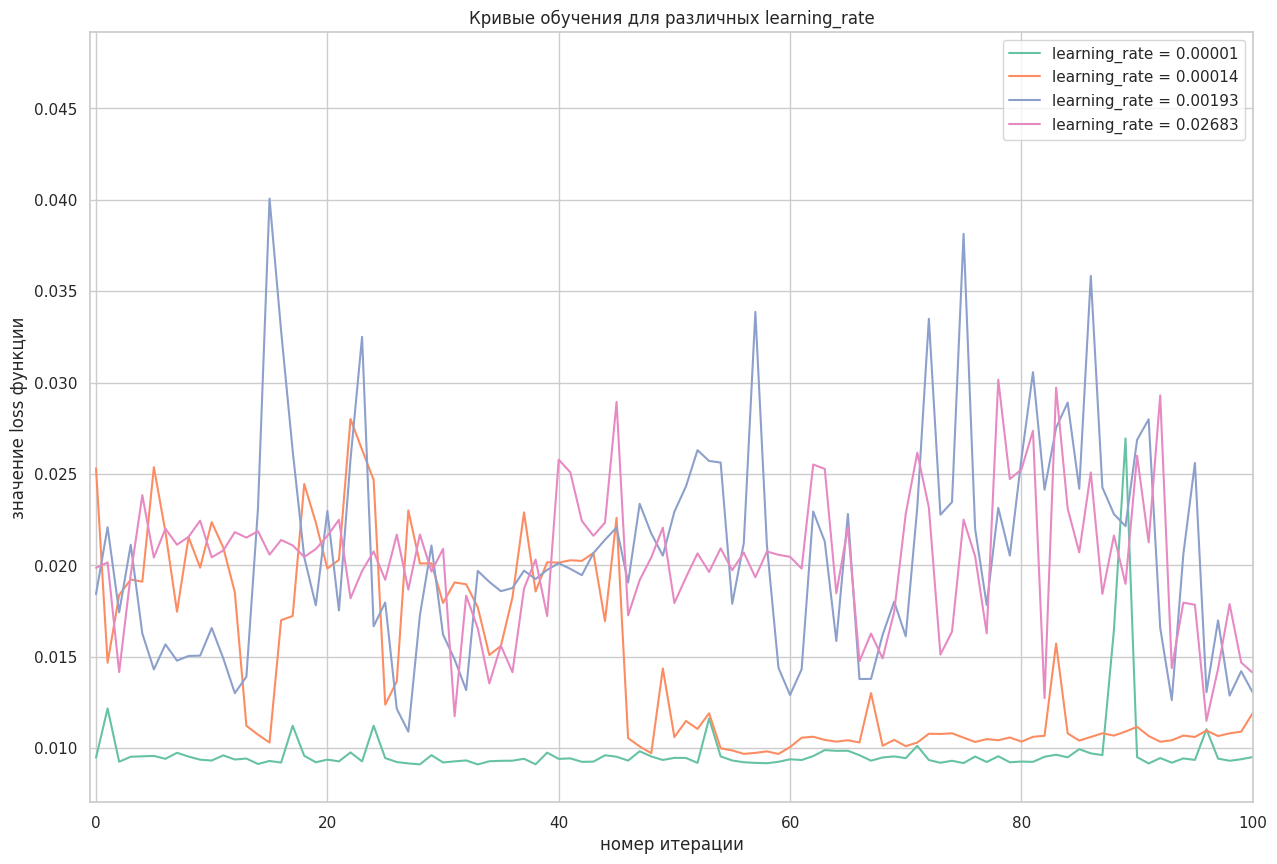

In [312]:
plt.figure(figsize=(15,10))
for number in range(4):
  history = histories_for_models[number]
  plt.plot([i for i in range(len(history))], [history[j][1] for j in range(len(history))], label=f'learning_rate = {learning_rate_list[number]:.5f}')
plt.xlabel('номер итерации')
plt.ylabel('значение loss функции')
plt.xlim(left=-0.5, right=100)
plt.legend()
plt.title("Кривые обучения для различных learning_rate")

Какой `learning_rate` стоит выбирать в зависимости от способа обучения модели? Чем плохи маленькие и большие `learning_rate`?

Можем заметить, что иерархия между accuracy для GD и для SGD примерно одинакова, поэтому наверное вне зависимости от способа обучения модели можно сказать следующее:Маленькие learning_rate плохи тем, что требуется больше итераций градиентного спуска, чтобы проходить адекватные расстояния, из-за этого может быть ситуация, в которой мы даже не дошли до положения равновесия, приэтом остановились итерации нашего обучения. Большие значения learning_rate плохи тем, что можно из-за слишком большого значения перескакивать положение равновесия постоянно (пример с лекции с $x^2$)

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- ff32f56c5ac017a9bbd819e9d918bf17 -->
**4.** Рассмотрите наилучшую модель с предыдущего шага. Визуализируйте значения полученных коэффициентов.

Можем заметить, что лучшая модель была под индексом 4, поэтому визуализируем ее коэффициенты:

['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'PhysActivity', 'Fruits', 'AnyHealthcare', 'NoDocbcCost', 'Age', 'GenHlth_2.0', 'GenHlth_3.0', 'GenHlth_4.0', 'GenHlth_5.0', 'Свободный Член']


Text(0.5, 0, 'Значение Коэффициента')

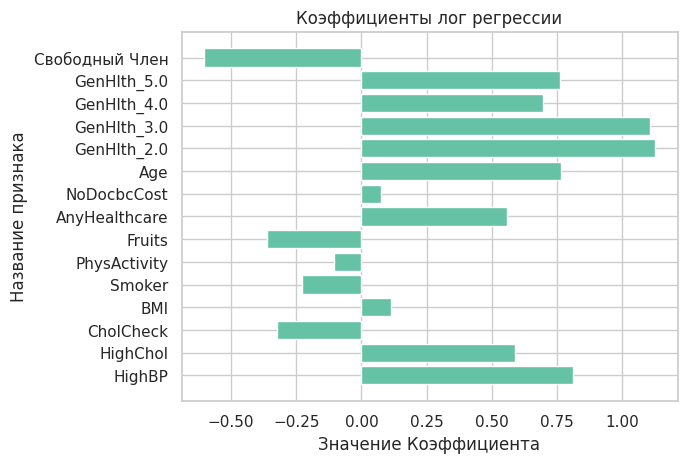

In [313]:
best_model = LogisticRegression(learning_rate=learning_rate_list[4])
best_model.fit(X_train_scaled, y_train)
names = X_train.columns.tolist() + ['Свободный Член']
print(names)
plt.barh(names, best_model.coef_)
plt.title('Коэффициенты лог регрессии')
plt.ylabel('Название признака')
plt.xlabel('Значение Коэффициента')

Как можно проинтерпретировать полученные результаты относительно решаемой задачи?

С помощью этого графика можно оценить влияние различных параметров, например можно заметить, что если взять огромную выборку из людей активно занимающихся спортом и отдельно взять выборку людей с высоким кровяным давлением(выборки одинакового размера), в первой выборке людей болеющих диабетом будет заметно меньше. Или что взяв выборку из людей едящих фрукты на постоянной основе и отдельно людей курящих можно также заметить, что во второй выборке аналогично будет больше людей больных диабетом. Поэтому коэффициенты можно интерпретировать друг относительно друга, а также просто оценивать влияние конкретного признака на вероятность болезни диабетом

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- d9db1dced64c0f75bb370e31595d818c -->
**5.** Сравните данную модель с бейзлайном, который в качестве предсказания выдает самый частый класс на обучающей выборке.

In [314]:
## точность модели
y_pred = best_model.predict(X_test_scaled)
print("Точность модели", accuracy_score(y_test, y_pred))
## точность бейзлайна
if (np.sum(y_train)/len(y_train) >= 0.5):
  mclass = 1
else:
  mclass = 0;
if (mclass == 0):
  y_pred = np.zeros(X_test_scaled.shape[0])
else:
  y_pred = np.ones(X_test_scaled.shape[0])
print("Точность бейзлайна", accuracy_score(y_test, y_pred))

Точность модели 0.7266597510373444
Точность бейзлайна 0.49844398340248963


Насколько хорошее получилось качество обученной модели?

Можем заметить, что точность нашей модели по метрике accuracy составляет 70%, при условии, что если мы выбираем самый частый класс у нас будет получаться 50%, наша модель дает сильно более значимый результат, поэтому будем считать нашу модель удовлетворительной для решения данной задачи.

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 66af3107d46e304b4ec5d685643fa588 -->
**6.** В исходной выборке оставьте два вещественных признака, которые имеют наибольшее влияние на предсказание в предыдущем пункте. Обучите на них модель на 10000 итерациях. Визуализируйте предсказание класса $1$ для нескольких промежуточных итераций.

In [315]:
iters = [10, 20, 500, 1000, 5000, 10000]

In [316]:
X_train = X_train[["Age", "BMI"]]
X_test = X_test[["Age", "BMI"]]
scaler = StandardScaler()
#признак, требующий нормализации - BMI,AGE
BMIandAge_scaled = scaler.fit_transform(X_train[["BMI", "Age"]])

# Остальные признаки (кроме "BMI" и "Age")
other_features = X_train.drop(columns=["BMI", "Age"]).values

# Объединяем нормализованные данные с остальными признаками с помощью hstack
X_train_scaled = np.hstack((other_features, BMIandAge_scaled))

BMIandAge_scaled = scaler.transform(X_test[["BMI", "Age"]])
other_features = X_test.drop(columns=["BMI", "Age"]).values

# Объединяем нормализованные данные с остальными признаками с помощью hstack
X_test_scaled = np.hstack((other_features, BMIandAge_scaled))



<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- da9c6c1a8068b61752e22c8d3afc9f51 -->
**Вывод:**

Cтоит быть очень аккуратным при выборе параметро num_iter, learning_rate, tol, потому что все эти гиперпараметры могут очень сильно влиять на обучение модели, например, слишком большое количство операций может привести (как видно выше), к переобучению или слишком маленькое к недообучению, что также портит точность нашей модели.

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- d11a6aa59c615661078a02a0c9fe90c8 -->
---
### Задача 6.

В этой задаче вам предлагается реализовать регрессию Хьюбера, а также применить ее к данным с выбросами. Для начала реализуйте класс по шаблону снизу. Обратите внимание, что класс `HuberRegression` &mdash; наследник класса `BaseEstimator`, это с легкостью позволит использовать наш класс в различных пайплайнах библиотеки `sklearn`.

**1.** Задача оптимизации для регрессии Хьюбера выглядит следующим образом:
$$\sum_{i=1}^n R\left(Y_i - x_i^T\theta\right) \rightarrow \min_\theta,$$
где $R(x)$ &mdash; функция потерь Хьюбера, определяемая как
$$R(x) = \frac{x^2}{2} I\left\{|x| < c\right\} + c \left(|x| - \frac{c}{2}\right)I\left\{|x| > c\right\}.$$

Выпишите формулы для градиентного и стохастического градиентного спусков. В чем польза такой функции потерь?

...

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 7564b9fdf7abe57af71d5144cdd94483 -->
**2.** Реализуем теперь класс. **При реализации класса запрещено пользоваться ИИ-инструментами.**

In [317]:
# При реализации класса запрещено пользоваться ИИ-инструментами.


class HuberRegression(BaseEstimator):
    """Класс, реализующий линейную регрессию с функцией потерь Хьюбера."""

    def __init__(self, c: float = 0.5, fit_intercept: bool = True, max_iter: int = 10000, learning_rate: float = 0.5,) -> None:
        """Инициализирует модель.

        Параметры: c (float): Константа из функции потерь Хьюбера.
        fit_intercept (bool): Добавлять ли константный признак. max_iter
        (int): Максимальное число итераций оптимизации.
        """
        self.c = c
        self.fit_intercept = fit_intercept
        self.max_iter = max_iter
        self.learning_rate = learning_rate
        self.coef_ = []

    def grad(self, X: np.ndarray, Y:np.ndarray, teta):
      gradient = 0;
      for i in range(X.shape[0]):
        tmp = Y[i] - X[i].T @ teta
        if (np.abs(tmp) < self.c):
          gradient -= X[i] * (tmp)
        else:
          gradient += -self.c * np.sign(tmp) * X[i]
      return gradient

    def _add_intercept(self, X: np.ndarray) -> np.ndarray:
        """Добавляет свободный коэффициент к матрице признаков.

        Параметры: X (np.ndarray): Исходная матрица признаков.

        Возвращает: np.ndarray: Матрица X с добавленным свободным
        коэффициентом.
        """
        X_copy = np.full((X.shape[0], X.shape[1] + 1), fill_value=1)
        X_copy[:, :-1] = X
        return X_copy

    def fit(self, X: np.ndarray, y: np.ndarray) -> "HuberRegression":
        """Обучает модель.

        Параметры:
        X (np.ndarray): Матрица признаков.
        y (np.ndarray): Вектор целевой переменной.

        Возвращает:
        HuberRegression: Обученная модель.
        """

        if self.fit_intercept:
            X_copy = self._add_intercept(X)
        else:
            X_copy = X.copy()

        teta = np.zeros(X_copy.shape[1])
        counter = 0

        if X.shape[0] != y.shape[0]:
            raise ValueError("Количество строк в X и y должно совпадать")

        for i in range(self.max_iter):
          counter += 1;
          gradient = self.grad(X_copy, y, teta)
          teta -= gradient * self.learning_rate


        self.coef_ = teta  # Коэффициенты модели
        self.intercept_ = teta[-1]  # Свободный коэффициент
        self.n_iter_ = counter  # Число итераций

        return self

    def predict(self, X: np.ndarray) -> np.ndarray:
        """Делает предсказание на новых данных.

        Параметры: X (np.ndarray): Матрица признаков.

        Возвращает: np.ndarray: Вектор предсказанных значений.
        """
        if self.fit_intercept:
            X_copy = self._add_intercept(X)
        else:
            X_copy = X.copy()

        if X_copy.shape[1] != self.coef_.shape[0]:
            raise ValueError("Число признаков в X не соответствует числу коэффициентов модели")


        return X_copy @ self.coef_

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 6a5cd74170aac817f849878e6dc1d059 -->
**3.** Загрузите данные из файлов `train.csv`, `test.csv`. Не забудьте, что всю аналитику, а также процесс обучения и подбор гиперпараметров необходимо выполнять на обучающей выборке.

In [318]:
data_train = pd.read_csv("train.csv")
data_test = pd.read_csv("test-2.csv")
X_train, y_train = data_train[['feature_1', 'feature_2', 'feature_3']], data_train['target']
X_test, y_test = data_test[['feature_1', 'feature_2', 'feature_3']], data_test['target']
print(data_train)

     feature_1  feature_2  feature_3      target
0     2.320800  -1.098571   0.117091  162.910894
1     0.625119  -0.782367  -0.813596   21.113006
2    -0.807648  -0.185054  -1.446535  -36.128990
3    -0.291837  -1.616474  -0.761492  -56.474495
4     0.938747   0.087531   0.607112  189.589573
..         ...        ...        ...         ...
330  -3.265200  -3.672560  -2.657417  708.438847
331  -3.853111  -3.152533  -3.493896  744.066873
332  -2.852711  -3.301565  -3.636479  707.650768
333  -3.060254  -2.831997  -3.012904  720.185363
334  -2.894927  -3.363324  -3.227533  757.920798

[335 rows x 4 columns]


Посмотрите на зависимость целевой переменной от каждого признака.

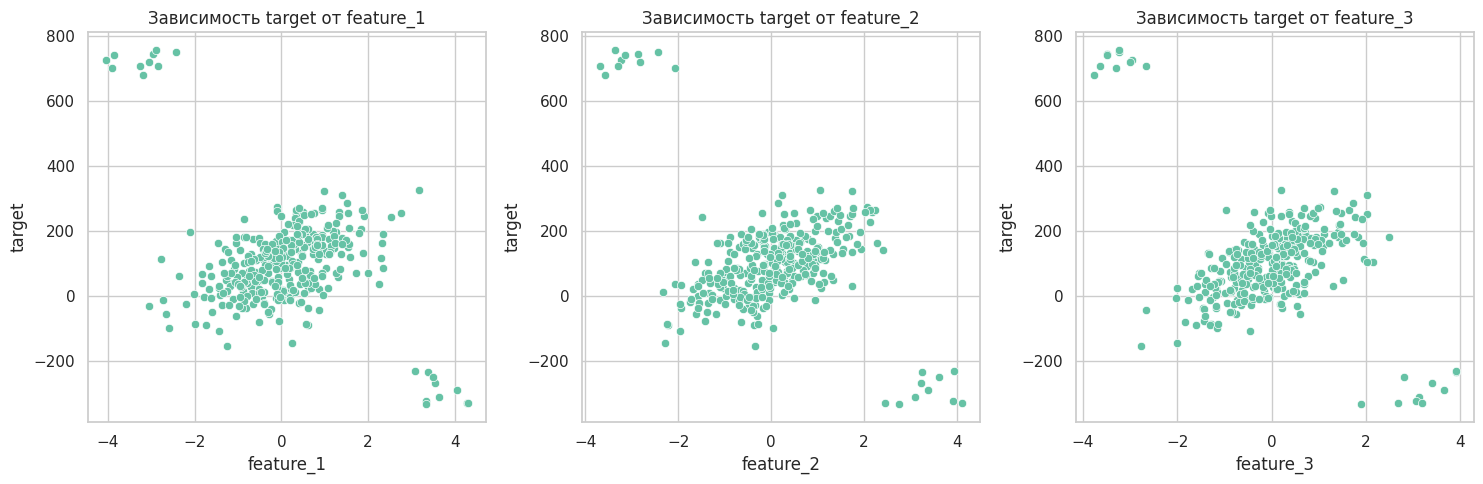

In [319]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# График для feature_1
sns.scatterplot(x=np.array(X_train['feature_1']).flatten(), y=np.array(y_train).flatten(), ax=axes[0])
axes[0].set_xlabel('feature_1')
axes[0].set_ylabel('target')
axes[0].set_title('Зависимость target от feature_1')

# График для feature_2
sns.scatterplot(x=np.array(X_train['feature_2']).flatten(), y=np.array(y_train).flatten(), ax=axes[1])
axes[1].set_xlabel('feature_2')
axes[1].set_ylabel('target')
axes[1].set_title('Зависимость target от feature_2')

# График для feature_3
sns.scatterplot(x=np.array(X_train['feature_3']).flatten(), y=np.array(y_train).flatten(), ax=axes[2])
axes[2].set_xlabel('feature_3')
axes[2].set_ylabel('target')
axes[2].set_title('Зависимость target от feature_3')

plt.tight_layout()
plt.show()

Что можно сказать о наличии возможных выбросов? Какое влияние они могут оказать?

Выбросы имееются для всех трех признаков, можно заметить, что в основной массе наблюдается следующее:
с увеличением feature, растет значение target, причем зависимость грубо скажем, похожа на "линейную". Если обучать нашу модель с этими данными, эти выбросы могут сильно сказаться на ошибке, из-за этого коэффициенты лин регрессии могут попортиться. Но вдруг может оказаться, что это никакие не выбросы, потому что, кажется, модель Хьюберта может хорошо отработать на этих данных

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 4a0c605a165e9e55e65c095ad5963e4c -->
**4.** Обучите простую линейную регрессию и посчитайте качество на тестовой выборке по метрике [MSE](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error).

In [320]:
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)
y_predl = lin_model.predict(X_test)
MSE = sklearn.metrics.mean_squared_error(y_test, y_predl)
print(MSE)

17025.80661012894


Что можно сказать о качестве нашей модели?

Учитывая, что  квадрат нашего значения в среднем находится между -40 и 40 тысячами, то погрешность в виде 17 тысяч является довольно сильной и качество модели сложно назвать удовлетворительным

**5.** Теперь обучите линейную регресcию Хьюбера и посчитайте качество на тестовой части по метрикe MSE.

In [321]:
Hub_model = HuberRegression()
Hub_model.fit(X_train, y_train)
y_predh = Hub_model.predict(X_test)
MSE = sklearn.metrics.mean_squared_error(y_test, y_predh)
print(MSE)

3657.094559938771


Что изменилось?


Можем заметить, что ошибка Хубера лучше учитывает подобного рода выбросы и среднеквадратичное отклонение на порядок меньше того, что выдает лин регрессия.

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 2154c451eb280ed839063dce469f6931 -->
**6.** Для обучающей выборки постройте два графика (по графику на каждую модель), на которых изобразите зависимость истинного и предсказанного значения таргета от каждого признака.

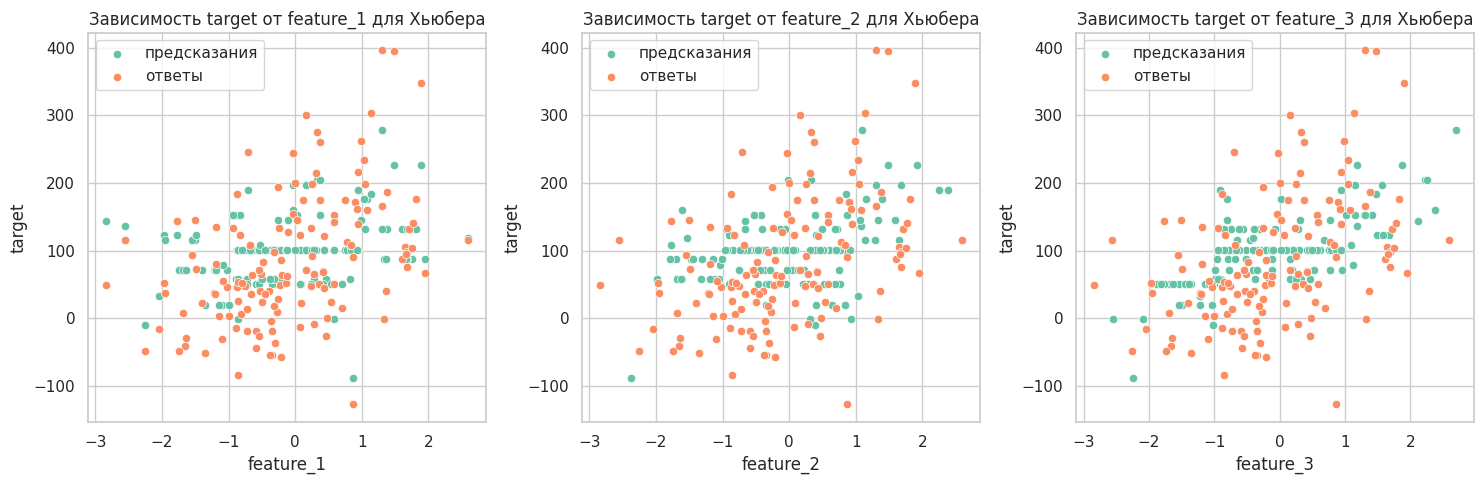

In [322]:
## Хьюбер
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# График для feature_1
sns.scatterplot(x=np.array(X_test['feature_1']).flatten(), y=np.array(y_predh).flatten(), ax=axes[0], label='предсказания')
sns.scatterplot(x=np.array(X_test['feature_1']).flatten(), y=np.array(y_test).flatten(), ax=axes[0], label='ответы')
axes[0].set_xlabel('feature_1')
axes[0].set_ylabel('target')
axes[0].set_title('Зависимость target от feature_1 для Хьюбера')

# График для feature_2
sns.scatterplot(x=np.array(X_test['feature_2']).flatten(), y=np.array(y_predh).flatten(), ax=axes[1], label='предсказания')
sns.scatterplot(x=np.array(X_test['feature_1']).flatten(), y=np.array(y_test).flatten(), ax=axes[1], label='ответы')
axes[1].set_xlabel('feature_2')
axes[1].set_ylabel('target')
axes[1].set_title('Зависимость target от feature_2 для Хьюбера')

# График для feature_3
sns.scatterplot(x=np.array(X_test['feature_3']).flatten(), y=np.array(y_predh).flatten(), ax=axes[2], label='предсказания')
sns.scatterplot(x=np.array(X_test['feature_1']).flatten(), y=np.array(y_test).flatten(), ax=axes[2], label='ответы')
axes[2].set_xlabel('feature_3')
axes[2].set_ylabel('target')
axes[2].set_title('Зависимость target от feature_3 для Хьюбера')

plt.tight_layout()
plt.show()

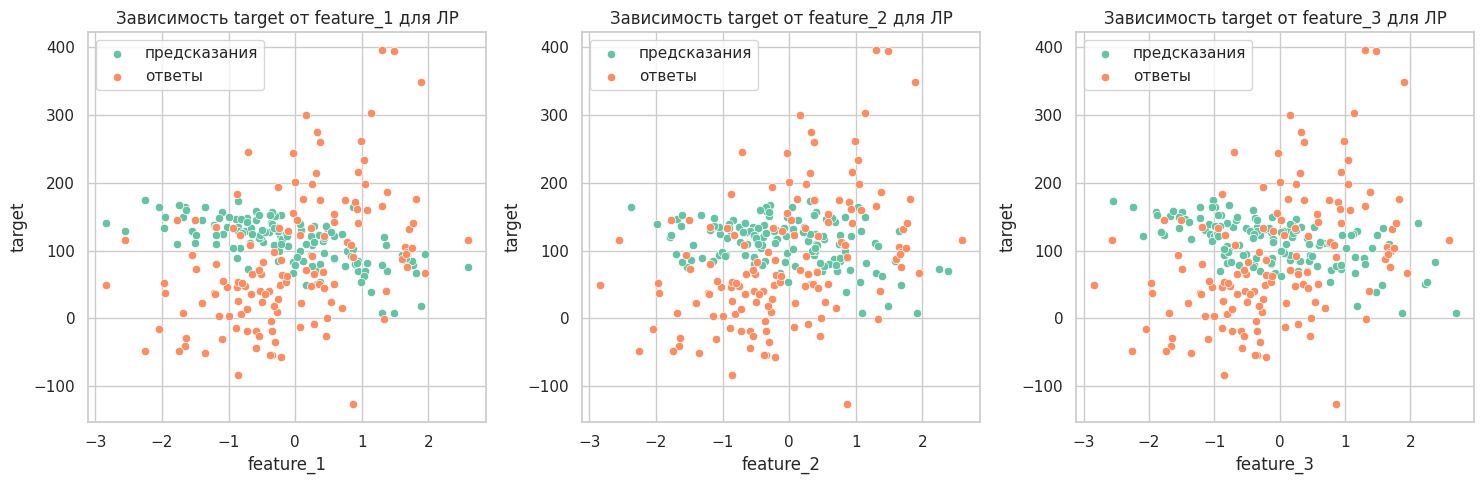

In [323]:
## Лин Регрессия МНК
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# График для feature_1
sns.scatterplot(x=np.array(X_test['feature_1']).flatten(), y=np.array(y_predl).flatten(), ax=axes[0], label='предсказания')
sns.scatterplot(x=np.array(X_test['feature_1']).flatten(), y=np.array(y_test).flatten(), ax=axes[0], label='ответы')
axes[0].set_xlabel('feature_1')
axes[0].set_ylabel('target')
axes[0].set_title('Зависимость target от feature_1 для ЛР')

# График для feature_2
sns.scatterplot(x=np.array(X_test['feature_2']).flatten(), y=np.array(y_predl).flatten(), ax=axes[1], label='предсказания')
sns.scatterplot(x=np.array(X_test['feature_1']).flatten(), y=np.array(y_test).flatten(), ax=axes[1], label='ответы')
axes[1].set_xlabel('feature_2')
axes[1].set_ylabel('target')
axes[1].set_title('Зависимость target от feature_2 для ЛР')

# График для feature_3
sns.scatterplot(x=np.array(X_test['feature_3']).flatten(), y=np.array(y_predl).flatten(), ax=axes[2], label='предсказания')
sns.scatterplot(x=np.array(X_test['feature_1']).flatten(), y=np.array(y_test).flatten(), ax=axes[2], label='ответы')
axes[2].set_xlabel('feature_3')
axes[2].set_ylabel('target')
axes[2].set_title('Зависимость target от feature_3 для ЛР')

plt.tight_layout()
plt.show()

Что можно заметить на этих графиках?

Можно заметить на графиках, что модель Хьюбера лучше оценивает разреженные системы, поскольку модель лин регрессии собирает их в 'кучу', а модель Хубера менее чувствительна к выбросам, из-за этого она позволяет лучше 'накрывать' разреженные системы

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 90cceb512579b67df499239e31ee0e3a -->
**7.** Обучите регрессию Хьюбера на данных из задачи 2 и сравните качество модели с простой линейной регрессией, которую вы построили в задаче 2.

In [324]:
##Предобработка данных
data = pd.read_csv('day.csv')
features = ['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp','atemp','hum', 'windspeed', 'cnt']
data = data[features]
train, test = train_test_split(data, test_size=0.2, random_state=42)
data.head()

categorial_features = ['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
real_features = ['temp','atemp','hum', 'windspeed']
target_feature = 'cnt'


encoder = OneHotEncoder(drop='first', sparse_output=False)
train_cat = encoder.fit_transform(train[['mnth', 'weekday','weathersit']])
X_train = np.hstack([train[real_features], train_cat])

In [325]:
modelHub = HuberRegression()
modelHub.fit(X_train, np.array(train[target_feature]))

test_cat = encoder.transform(test[['mnth', 'weekday','weathersit']])
X_test = np.hstack([test[real_features], test_cat])

test_preds = modelHub.predict(X_test)

MSE = sklearn.metrics.mean_squared_error(test['cnt'], test_preds)

MAE = sklearn.metrics.mean_absolute_error(test['cnt'], test_preds)

MAPE = 100 * ((np.abs(test['cnt'] - test_preds)) / test['cnt']).mean()

print("MSE", MSE)
print("MAE", MAE)
print("MAPE", MAPE)

MSE 2454668.8857757486
MAE 1350.5902914137914
MAPE 120.00307977146186


**Вывод:**

Мы не знаем выброс ли данные точки, т.к у нас нет более содержательной информации о данных, чем просто расположение точек на графике, но мы можем попытаться уменьшить вклад данных точек с помощью некоторой модели ошибки, например, Функция Хьюбера помогает работать с такого разброса данными и ошибка при работе с ними на порядок меньше. Но при этом эта модель может быть не всегда удобна, например, задача про велосипеды из 2 задания.

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 38dcbf8dc11db564c7513c7f0e5c8e0d -->
---
### Задача 7.


Рассмотрим модель одномерной регрессии $y(x) = \theta x$, где $x \in \mathbb{R}$ &mdash; одномерный признак, $y \in \mathbb{R}$ &mdash; целевой признак, $\theta \in \mathbb{R}$ &mdash; неизвестный параметр. Имеется выборка размера $n$, полученная по правилу
	$$Y_i = \theta x_i + \varepsilon_i,\ \ \ i=1,...,n,$$
где $\varepsilon_i$ &mdash; случайная ошибка измерений.

Предложите точный алгоритм поиска оценки параметра $\theta$ методом наименьших модулей, то есть $$\sum_{i=1}^n \left|Y_i - \theta x_i\right| \to \min_\theta,$$ работающий за время $O(n \log n)$. Приведите его описание и теоретическое обоснование. Реализация в коде не требуется.

**Решение:**
Можем считать, что $x_{i}$ отличны от нуля, иначе их можно и так не учитывать, потому что на них teta никак не влияет, поэтому можем записать следующее равенство, по факту мы решаем следующую задачу: $$\sum_{i=1}^{n} |Y_{i} - \theta x_{i}|\rightarrow \min_{\theta} ⟺ \sum_{i=1}^{n}|x_{i}|\left|\frac{Y_{i}}{x_{i}} - \theta \right| \rightarrow \min_{\theta}$$
Будем минимизировать нашу функцию $S(\theta)$
По сути задача сводится к анализу 'производной' нашей функции, наша функция будет иметь некоторый вид вроде V. Поэтому задача сводится к анализу нашей производной. Рассмотрим массив $\frac{Y_{i}}{x_{i}}$, отсортируем его, как раз отсюда берется асимптотика $O(nlogn)$. Выберем массив для коэффициентов $|x_{i}|$ перед соответствующими $\frac{Y_{i}}{x_{i}}$ (выставлены в таком же порядке). Тогда построим массив префиксных сумм и найдем первый элемент $k$ такой что, $prefixsum[k]$ > $\frac{\sum_{i=1}^{n}\frac{Y_{i}}{x_{i}}}{2}$. В этом значении k(под тем же индексом мы можем взять $\frac{Y_{k}}{x_{k}} = \theta$ т.к производная меняет знак (минимум функции)